In [21]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier
from scipy.stats import ks_2samp


warnings.filterwarnings("ignore")
%matplotlib inline

In [12]:
# Load csv file
df = pd.read_csv(r'C:\Users\rohit\VSCode\mongotest\aps_failure_training_set1.csv', na_values="na")
train = pd.read_csv(r'C:\Users\rohit\VSCode\mongotest\artifact\03182024__232148\data_ingestion\dataset\train.csv')
test = pd.read_csv(r'C:\Users\rohit\VSCode\mongotest\artifact\03182024__232148\data_ingestion\dataset\test.csv')

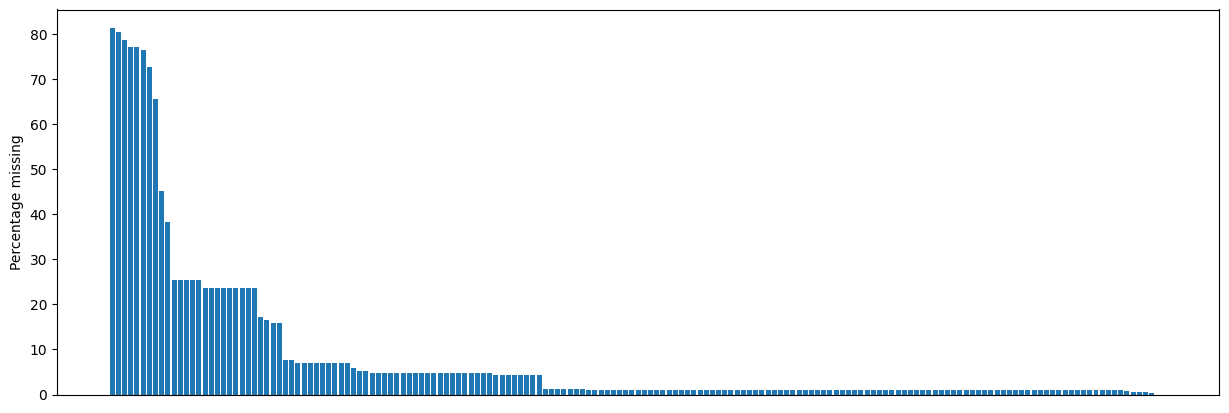

In [4]:
# Plotting Missing values count for each column
fig, ax = plt.subplots(figsize=(15,5))

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

In [5]:
## Dropping columns which has more than 70% of missing values
dropcols = missing[missing[0]>80]
dropcols

,0
br_000,81.410965
bq_000,80.501824


In [6]:
df.drop(list(dropcols.index), axis=1, inplace=True)

In [7]:
missing_values_count= df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
print(f"Percentage of total missing cells in the data {(total_missing/total_cells) * 100}%")

Percentage of total missing cells in the data 7.473610854034455%


In [48]:
# Load csv file
base_df = pd.read_csv(r'C:\Users\rohit\VSCode\mongotest\notebook\base_df.csv', na_values="na")
train1 = pd.read_csv(r'C:\Users\rohit\VSCode\mongotest\notebook\test_df1.csv')
test1 = pd.read_csv(r'C:\Users\rohit\VSCode\mongotest\notebook\test_df1.csv')

In [42]:
# Count the total number of elements before dropping NaN values
total_before_drop = len(base_df['ac_000'])

# Count the number of NaN values before dropping
nan_count_before_drop = base_df['ac_000'].isna().sum()

print(f"Total number of elements before dropping NaN: {total_before_drop}")
print(f"Number of NaN values before dropping: {nan_count_before_drop}")

Total number of elements before dropping NaN: 36188
Number of NaN values before dropping: 2141


In [43]:
# Drop NaN values
base_df['ac_000'].dropna(inplace=True)
train1['ac_000'].dropna(inplace=True)

# Count the total number of elements after dropping NaN values
total_after_drop = len(base_df['ac_000'])

# Since we've dropped the NaN values, let's count again (though it should be 0 if dropna worked)
nan_count_after_drop = base_df['ac_000'].isna().sum()

print(f"Total number of elements after dropping NaN: {total_after_drop}")
print(f"Number of NaN values after dropping: {nan_count_after_drop}")

Total number of elements after dropping NaN: 36188
Number of NaN values after dropping: 2141


In [49]:
# Count NaN values directly
nan_count_before = base_df['ac_000'].isna().sum()
nan_count_before_tr = train1['ac_000'].isna().sum()

print(f"Number of NaN values before dropping: {nan_count_before, nan_count_before_tr}")

# Drop NaN values
base_df.dropna(subset=['ac_000'], inplace=True)
train1.dropna(subset=['ac_000'], inplace=True)
# Count again
nan_count_after = base_df['ac_000'].isna().sum()
nan_count_after_tr = train1['ac_000'].isna().sum()
print(f"Number of NaN values after dropping: {nan_count_after, nan_count_after_tr}")

# Or check the length of the DataFrame
print(f"Total number of elements after dropping NaN: {len(base_df), len(train1)}")


Number of NaN values before dropping: (2141, 418)
Number of NaN values after dropping: (0, 0)
Total number of elements after dropping NaN: (34047, 6820)


In [53]:
import scipy
print(scipy.__version__)

1.12.0


In [26]:
print(base_df['ac_000'].unique())


[1.82000000e+02 2.92600000e+03 1.59400000e+03 ... 1.96800000e+03
 2.60200000e+03 2.13070654e+09]


In [19]:
df.isna().sum()/df.shape[0]

class     0.000000
aa_000    0.000000
ab_000    0.770863
ac_000    0.059163
ad_000    0.254228
            ...   
ee_007    0.010473
ee_008    0.010473
ee_009    0.010473
ef_000    0.047806
eg_000    0.047778
Length: 171, dtype: float64

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp

In [3]:
# Read the DataFrames
base_df = pd.read_csv(r'C:\Users\rohit\VSCode\mongotest\notebook\base_df.csv')
train_df = pd.read_csv(r'C:\Users\rohit\VSCode\mongotest\notebook\train_df1.csv')
test_df = pd.read_csv(r'C:\Users\rohit\VSCode\mongotest\notebook\test_df1.csv')

In [4]:
def perform_ks_test(df1, df2, alpha=0.05):
    results = {}
    for column in df1.columns:
        if column in df2.columns:
            statistic, p_value = ks_2samp(df1[column], df2[column])
            results[column] = {
                'statistic': statistic,
                'p_value': p_value,
                'same_distribution': p_value > alpha
            }
    return results

In [5]:
# Perform KS test
base_vs_train = perform_ks_test(base_df, train_df)
base_vs_test = perform_ks_test(base_df, test_df)


In [6]:
# Print results
print("KS Test Results: Base vs Train")
for column, result in base_vs_train.items():
    print(f"{column}:")
    print(f"  Statistic: {result['statistic']:.4f}")
    print(f"  P-value: {result['p_value']:.4f}")
    print(f"  Same distribution: {result['same_distribution']}")
    print()

KS Test Results: Base vs Train
class:
  Statistic: 0.0006
  P-value: 1.0000
  Same distribution: True

aa_000:
  Statistic: 0.0030
  P-value: 0.9986
  Same distribution: True

ac_000:
  Statistic: nan
  P-value: nan
  Same distribution: False

ae_000:
  Statistic: nan
  P-value: nan
  Same distribution: False

af_000:
  Statistic: nan
  P-value: nan
  Same distribution: False

ag_000:
  Statistic: nan
  P-value: nan
  Same distribution: False

ag_001:
  Statistic: nan
  P-value: nan
  Same distribution: False

ag_002:
  Statistic: nan
  P-value: nan
  Same distribution: False

ag_003:
  Statistic: nan
  P-value: nan
  Same distribution: False

ag_004:
  Statistic: nan
  P-value: nan
  Same distribution: False

ag_005:
  Statistic: nan
  P-value: nan
  Same distribution: False

ag_006:
  Statistic: nan
  P-value: nan
  Same distribution: False

ag_007:
  Statistic: nan
  P-value: nan
  Same distribution: False

ag_008:
  Statistic: nan
  P-value: nan
  Same distribution: False

ag_009:


In [7]:
print("\nKS Test Results: Base vs Test")
for column, result in base_vs_test.items():
    print(f"{column}:")
    print(f"  Statistic: {result['statistic']:.4f}")
    print(f"  P-value: {result['p_value']:.4f}")
    print(f"  Same distribution: {result['same_distribution']}")
    print()


KS Test Results: Base vs Test
class:
  Statistic: 0.0022
  P-value: 1.0000
  Same distribution: True

aa_000:
  Statistic: 0.0120
  P-value: 0.3479
  Same distribution: True

ac_000:
  Statistic: nan
  P-value: nan
  Same distribution: False

ae_000:
  Statistic: nan
  P-value: nan
  Same distribution: False

af_000:
  Statistic: nan
  P-value: nan
  Same distribution: False

ag_000:
  Statistic: nan
  P-value: nan
  Same distribution: False

ag_001:
  Statistic: nan
  P-value: nan
  Same distribution: False

ag_002:
  Statistic: nan
  P-value: nan
  Same distribution: False

ag_003:
  Statistic: nan
  P-value: nan
  Same distribution: False

ag_004:
  Statistic: nan
  P-value: nan
  Same distribution: False

ag_005:
  Statistic: nan
  P-value: nan
  Same distribution: False

ag_006:
  Statistic: nan
  P-value: nan
  Same distribution: False

ag_007:
  Statistic: nan
  P-value: nan
  Same distribution: False

ag_008:
  Statistic: nan
  P-value: nan
  Same distribution: False

ag_009:


In [8]:
base_df['aa_000']

0        153204.0
1        453236.0
2         72504.0
3        762958.0
4        695994.0
           ...   
36183    153002.0
36184      2286.0
36185       112.0
36186     80292.0
36187     40222.0
Name: aa_000, Length: 36188, dtype: float64

In [9]:
train_df['aa_000']

0            22.0
1            10.0
2         41474.0
3         18928.0
4            26.0
           ...   
28945    180262.0
28946     39754.0
28947      1798.0
28948    179692.0
28949     30766.0
Name: aa_000, Length: 28950, dtype: float64